In [2]:
import numpy as np         
import os                  
import random 
import matplotlib.pyplot as plt
 
import cv2
TRAIN_DIR = 'C:/Users/Sada Siva/Desktop/DL/training_set/training_set'
TEST_DIR = 'C:/Users/Sada Siva/Desktop/DL/test_set/test_set'


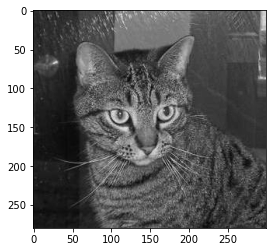

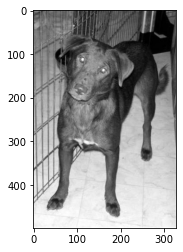

In [22]:

category=['cats','dogs']
for i in category:
    path=os.path.join(TRAIN_DIR,i)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
       

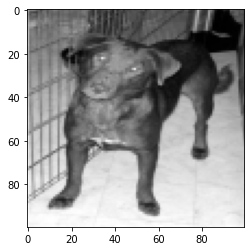

In [23]:
IMG_SIZE=100
new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE), interpolation=cv2.INTER_AREA)
plt.imshow(new_array,cmap='gray')
plt.show()

In [24]:
training_data=[]
def create_training_data():
    for i in category:
        path=os.path.join(TRAIN_DIR,i)
        class_num=category.index(i)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE),interpolation=cv2.INTER_AREA)
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()


In [25]:
training_data

[[array([[ 43,  44,  50, ..., 115, 184, 195],
         [ 40,  38,  42, ..., 117, 175, 193],
         [ 43,  37,  38, ..., 110, 178, 195],
         ...,
         [ 21,  20,  20, ...,  65,  73,  51],
         [ 24,  19,  21, ...,  50,  45,  35],
         [ 28,  20,  23, ...,  68,  36,  37]], dtype=uint8),
  0],
 [array([[ 34,  30,  45, ..., 152, 153, 149],
         [ 48,  51,  54, ..., 152, 155, 152],
         [ 55,  56,  57, ..., 154, 157, 154],
         ...,
         [159, 155, 153, ..., 169, 172, 158],
         [166, 158, 152, ..., 168, 171, 156],
         [146, 136, 134, ..., 169, 170, 153]], dtype=uint8),
  0],
 [array([[221, 223, 222, ..., 242, 240, 243],
         [222, 222, 223, ..., 246, 241, 238],
         [222, 222, 220, ..., 249, 244, 243],
         ...,
         [206, 201, 193, ..., 215, 212, 214],
         [210, 209, 203, ..., 215, 212, 213],
         [214, 207, 191, ..., 216, 212, 213]], dtype=uint8),
  0],
 [array([[115, 118, 122, ...,  60,  90,  68],
         [ 99, 105, 1

In [26]:
len(training_data)

8005

In [27]:
import random
random.shuffle(training_data)

In [28]:

for sample in training_data[:10]:
    print(sample[1])

1
1
1
0
0
1
1
0
0
1


In [29]:
testing_data=[]
def create_testing_data():
    for i in category:
        path=os.path.join(TEST_DIR,i)
        class_num=category.index(i)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE),interpolation=cv2.INTER_AREA)
                testing_data.append([new_array,class_num])
            except Exception as e:
                pass
create_testing_data()

In [30]:
testing_data

[[array([[ 53,  94,  70, ...,  82,  78,  41],
         [ 69, 206, 129, ..., 181, 150,  44],
         [ 67, 228, 133, ..., 186, 167,  36],
         ...,
         [ 68, 187, 118, ..., 193, 171,  41],
         [ 68, 135,  89, ..., 139, 129,  40],
         [ 28,  32,  19, ...,  29,  30,  19]], dtype=uint8),
  0],
 [array([[116, 116, 112, ...,  58,  58,  56],
         [116, 118, 120, ...,  60,  57,  57],
         [112, 124, 122, ...,  58,  62,  72],
         ...,
         [ 77,  78,  79, ...,  55,  55,  56],
         [ 77,  79,  80, ...,  56,  55,  56],
         [ 77,  76,  78, ...,  56,  56,  55]], dtype=uint8),
  0],
 [array([[ 56,  58,  59, ...,  84,  87,  84],
         [ 54,  48,  64, ...,  88,  88,  87],
         [ 45,  52,  67, ...,  86,  84,  85],
         ...,
         [138, 157, 155, ..., 135, 127, 129],
         [137, 142, 149, ..., 138, 143, 144],
         [133, 131, 142, ..., 134, 140, 142]], dtype=uint8),
  0],
 [array([[ 92,  91,  99, ..., 105, 106,  96],
         [ 88,  98,  

In [31]:
len(testing_data)

2023

In [32]:
import random
random.shuffle(testing_data)

In [33]:
for sample in testing_data[:10]:
    print(sample[1])

1
1
0
0
0
0
0
1
1
1


In [34]:
X=[]
y=[]

In [35]:
for features,label in training_data:
    X.append(features)
    y.append(label)

In [36]:
len(X)

8005

In [37]:
X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)
X.shape

(8005, 100, 100, 1)

In [38]:
X.shape[1:]

(100, 100, 1)

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [40]:
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(100))
model.add(Activation('sigmoid'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [41]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [42]:
X=X/255.0

In [43]:
X

array([[[[0.44313725],
         [0.45490196],
         [0.72941176],
         ...,
         [0.55294118],
         [0.58039216],
         [0.61568627]],

        [[0.51764706],
         [0.83921569],
         [0.89803922],
         ...,
         [0.4745098 ],
         [0.62352941],
         [0.72941176]],

        [[0.57254902],
         [0.65098039],
         [0.70980392],
         ...,
         [0.5372549 ],
         [0.6       ],
         [0.76470588]],

        ...,

        [[0.96078431],
         [0.94901961],
         [0.95294118],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]],

        [[0.95686275],
         [0.95686275],
         [0.95294118],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]],

        [[0.95686275],
         [0.94901961],
         [0.95686275],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]]],


       [[[0.15294118],
         [0.16862745],
         [0.18

In [44]:
y=np.array(y,dtype=np.uint8)
y

array([1, 1, 1, ..., 1, 0, 1], dtype=uint8)

In [45]:
model.fit(X,y,validation_split=0.3,epochs=10)

Epoch 1/10
176/176 [==============================] - 109s 544ms/step - loss: 0.6911 - accuracy: 0.5377 - val_loss: 0.6654 - val_accuracy: 0.6157
Epoch 2/10
176/176 [==============================] - 85s 484ms/step - loss: 0.6667 - accuracy: 0.5880 - val_loss: 0.6444 - val_accuracy: 0.6328
Epoch 3/10
176/176 [==============================] - 85s 483ms/step - loss: 0.6393 - accuracy: 0.6521 - val_loss: 0.6800 - val_accuracy: 0.6103
Epoch 4/10
176/176 [==============================] - 90s 512ms/step - loss: 0.6336 - accuracy: 0.6561 - val_loss: 0.6338 - val_accuracy: 0.6482
Epoch 5/10
176/176 [==============================] - 88s 498ms/step - loss: 0.5761 - accuracy: 0.6905 - val_loss: 0.5941 - val_accuracy: 0.6724
Epoch 6/10
176/176 [==============================] - 6501s 37s/step - loss: 0.5689 - accuracy: 0.7026 - val_loss: 0.6089 - val_accuracy: 0.6665
Epoch 7/10
176/176 [==============================] - 86s 491ms/step - loss: 0.5460 - accuracy: 0.7303 - val_loss: 0.5951 - val_a

In [46]:
def prepare(filepath):
    img_size=100
    img_array=cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
    new_array=cv2.resize(img_array,(img_size,img_size),interpolation=cv2.INTER_AREA)
    return np.array(new_array).reshape(-1,img_size,img_size,1)

In [47]:
a=prepare('C:/Users/Sada Siva/Desktop/cat.jpg')
a=a/255
a

array([[[[0.35686275],
         [0.35294118],
         [0.36470588],
         ...,
         [0.2745098 ],
         [0.2627451 ],
         [0.25882353]],

        [[0.35686275],
         [0.35294118],
         [0.36470588],
         ...,
         [0.29411765],
         [0.2745098 ],
         [0.27058824]],

        [[0.35294118],
         [0.34901961],
         [0.36078431],
         ...,
         [0.33333333],
         [0.30588235],
         [0.29411765]],

        ...,

        [[0.32156863],
         [0.30588235],
         [0.30196078],
         ...,
         [0.37254902],
         [0.41568627],
         [0.42745098]],

        [[0.31764706],
         [0.30588235],
         [0.29411765],
         ...,
         [0.41960784],
         [0.4       ],
         [0.40784314]],

        [[0.3254902 ],
         [0.30980392],
         [0.28627451],
         ...,
         [0.41176471],
         [0.42745098],
         [0.40392157]]]])

In [48]:
pred=model.predict([a])
pred

array([[0.22783875]], dtype=float32)

In [49]:
model.predict_classes([a])

C:\Users\Sada Siva\condas\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0]])

In [51]:
b=prepare('c:/Users/Sada Siva/Desktop/dog.jpg')
b=b/255.0
b

array([[[[0.08627451],
         [0.04705882],
         [0.04313725],
         ...,
         [0.20392157],
         [0.18823529],
         [0.18431373]],

        [[0.09019608],
         [0.05098039],
         [0.04705882],
         ...,
         [0.20784314],
         [0.19215686],
         [0.18431373]],

        [[0.09803922],
         [0.05490196],
         [0.04705882],
         ...,
         [0.21176471],
         [0.19215686],
         [0.18823529]],

        ...,

        [[0.38039216],
         [0.37254902],
         [0.4       ],
         ...,
         [0.25490196],
         [0.25098039],
         [0.25882353]],

        [[0.39215686],
         [0.36862745],
         [0.40784314],
         ...,
         [0.25882353],
         [0.25490196],
         [0.25098039]],

        [[0.40392157],
         [0.38431373],
         [0.41568627],
         ...,
         [0.27058824],
         [0.25490196],
         [0.25490196]]]])

In [52]:
model.predict([b])

array([[0.82050467]], dtype=float32)

In [53]:
model.predict_classes([b])

C:\Users\Sada Siva\condas\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1]])

In [54]:
len(testing_data)

2023

In [55]:
x1=[]
y1=[]

In [56]:
for features,label in testing_data:
    x1.append(features)
    y1.append(label)

In [57]:
x1=np.array(x1).reshape(-1,IMG_SIZE,IMG_SIZE,1)
x1

array([[[[ 89],
         [ 92],
         [ 87],
         ...,
         [ 68],
         [ 69],
         [ 69]],

        [[ 87],
         [ 92],
         [ 90],
         ...,
         [ 64],
         [ 63],
         [ 64]],

        [[ 90],
         [ 95],
         [ 91],
         ...,
         [ 64],
         [ 64],
         [ 66]],

        ...,

        [[ 49],
         [ 49],
         [ 48],
         ...,
         [188],
         [188],
         [187]],

        [[ 48],
         [ 48],
         [ 48],
         ...,
         [187],
         [188],
         [190]],

        [[ 48],
         [ 47],
         [ 49],
         ...,
         [188],
         [188],
         [189]]],


       [[[ 55],
         [ 51],
         [ 50],
         ...,
         [ 52],
         [ 55],
         [ 54]],

        [[ 52],
         [ 53],
         [ 54],
         ...,
         [ 54],
         [ 55],
         [ 59]],

        [[ 50],
         [ 51],
         [ 51],
         ...,
         [ 51],
         [

In [58]:
y1=np.array(y1,dtype=np.uint8)
y1

array([1, 1, 0, ..., 0, 1, 1], dtype=uint8)

In [59]:
x1=x1/255.0

In [60]:
model.predict_classes(x1)

array([[1],
       [0],
       [0],
       ...,
       [0],
       [1],
       [1]])

In [61]:
y1[:5]

array([1, 1, 0, 0, 0], dtype=uint8)

In [62]:
model.predict_classes(x1[:5])

array([[1],
       [0],
       [0],
       [1],
       [0]])